In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sns.set()
%matplotlib inline

In [229]:
df = pd.read_excel('CHE34600_Lab1_Data.xlsx')
print(df)

     RPM  flow rate (gal/min)  flow rate (m^3/s)  DC amp  DC volt  \
0    800                   58           0.003659    1.50     51.4   
1    800                   40           0.002524    1.30     50.8   
2    800                   20           0.001262    1.30     51.5   
3    800                   30           0.001893    1.25     51.1   
4    900                   73           0.004606    1.70     63.2   
5    900                   37           0.002334    1.60     63.5   
6    900                   25           0.001577    1.60     63.5   
7    900                   15           0.000946    1.55     63.5   
8   1100                   75           0.004732    1.75     64.2   
9   1100                   40           0.002524    1.60     64.6   
10  1100                   30           0.001893    1.60     64.8   
11  1100                   20           0.001262    1.55     64.8   

    p1 (in of H2O)  p2 (psi)   p1 (Pa)      p2 (Pa)      ΔP (Pa)      Wflow  \
0             -0.6     

C:\Users\aquin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9694103787200171


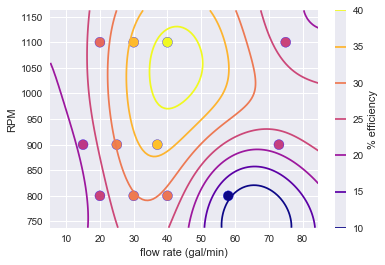

In [260]:
cmap = 'plasma'
scaler = StandardScaler()
X = scaler.fit_transform(np.column_stack((df['flow rate (gal/min)'], df['RPM'])))
y = np.array(df['η'])

svr = SVR(C=50, kernel='rbf').fit(X, y)
print(svr.score(X, y))

(x0_min, x0_max, x1_min, x1_max) = (np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5,
                                    np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5)
xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 100), np.linspace(x1_min, x1_max, 100))
X_ = np.array([xx0.ravel(), xx1.ravel()]).T
y_ = svr.predict(X_)
X = scaler.inverse_transform(X)
X_ = scaler.inverse_transform(X_)

grad = plt.contour(X_[:, 0].reshape(xx0.shape), X_[:, 1].reshape(xx0.shape), y_.reshape(xx0.shape),
                   cmap=cmap)
bar = plt.colorbar(grad)
bar.set_label('% efficiency')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='b', s=100)
plt.xlabel('flow rate (gal/min)')
plt.ylabel('RPM')
plt.savefig('efficiency_plot.png', dpi=500)
plt.show()

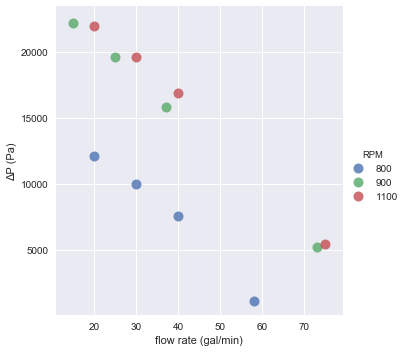

In [265]:
sns.lmplot(x='flow rate (gal/min)', y='ΔP (Pa)', hue='RPM', 
           data=df, fit_reg=False, scatter_kws={"s": 100})
plt.savefig('q_vs_deltaP.png', dpi=500)
plt.show()

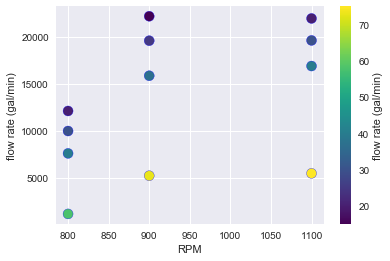

In [266]:
points = plt.scatter(df['RPM'], df['ΔP (Pa)'], c=df['flow rate (gal/min)'], cmap='viridis', edgecolors='b', s=100)
bar = plt.colorbar(points)
bar.set_label('flow rate (gal/min)')
plt.xlabel('RPM')
plt.ylabel('flow rate (gal/min)')
plt.savefig('RPM_vs_deltaP.png', dpi=500)
plt.show()